#  Clustering


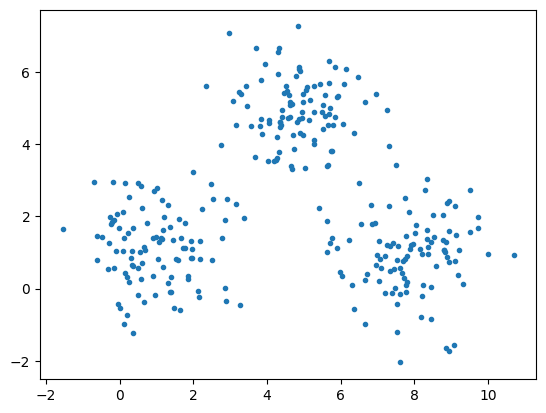

In [ ]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt

real_centers = [[1,1], [5,5], [8, 1]]
X, y = make_blobs(n_samples=300, centers=real_centers, n_features=2,
                   random_state=0,)

plt.scatter(X[:,0], X[:,1], marker='.')

#### Implement K-means

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from scipy.spatial.distance import cdist
from copy import deepcopy

class KMeans(BaseEstimator, ClassifierMixin):

    def __init__(self, k=3, centers=None):
        self.k = k
        self.centers = centers

    def _predict(self, X, centers):
        # Calculate the pairwise distance between each sample in X and the centroids.
        distance = cdist(X, centers)
        return np.argmin(distance, axis=1)


    def predict(self, X, y=None):
        return self._predict(X, self.centers)

    def fit(self, X, y=None):
        k = self.k
        c = X.shape[1]
        if self.centers is None:
            mean = np.mean(X, axis = 0)
            std = np.std(X, axis = 0)
            self.centers = np.random.randn(k, c) * std + mean
        centers = self.centers
        centers_new = deepcopy(self.centers) # Store new centers

        error = -1

        # When, after an update, the estimate of that center stays the same, exit loop
        while error != 0:
            # Predict clusters of each point using the current clusters
            clusters = self.predict(X, centers)

            centers_old = deepcopy(centers_new)
            # Calculate mean for every cluster and update the center in 'centers_new'
            for i in range(k):
                centers_new[i] = np.mean(X[clusters == i], axis=0)

            error = np.linalg.norm(centers_new - centers_old)
            centers = centers_new
        self.centers = centers_new
        return self

    def score(self, X, y=None):
        return 0


In [ ]:
!pip3 install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.1 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 10.3 MB/s eta 0:00:00


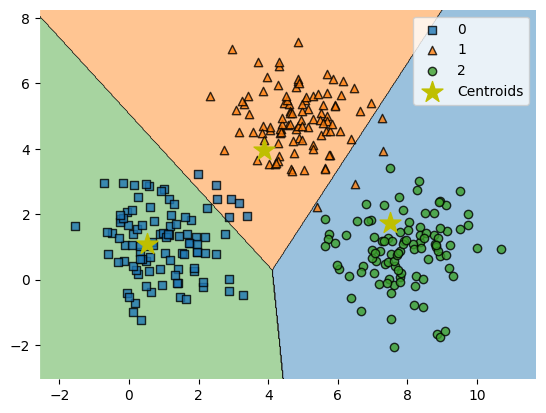

In [ ]:
from mlxtend.plotting import plot_decision_regions

clf = KMeans(3, None).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='Centroids')
plt.legend()

### K-Means++

In [ ]:
from numpy.random import choice

def choose(X, prob):
    # Return one point of X chosen randomly with probablity p
    idx = choice(X.shape[0], 1, p=prob)
    return X[idx]

def kmeans_pp(X, k):
    n = X.shape[0]
    weights = np.ones(n) / n
    centers = []
    while len(centers) < k:
        # Choose a centroid with the current weights
        centroid = choose(X, weights)
        centers.extend(centroid)


        # Calculate the pair-wise distances
        # between the datapoints X and the current centers
        # get min distance then square it.
        # Obtain new probabilities in weights.

        distances = cdist(X, centers)
        min_dist = distances.min(axis=1)
        d_squared = min_dist**2
        weights = d_squared / d_squared.sum()

    return np.array(centers)

initial_centers = kmeans_pp(X, 3)

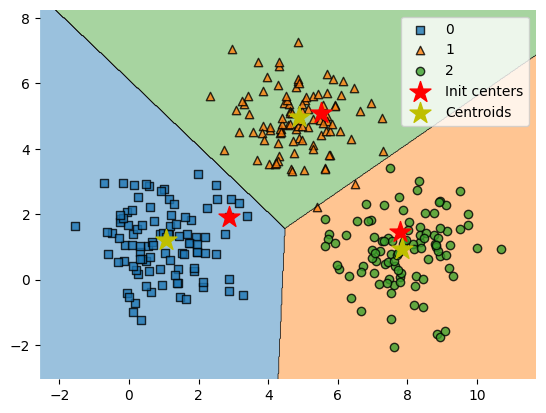

In [ ]:
clf = KMeans(3, initial_centers).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='*', c='red', s=250,label='Init centers')
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='Centroids')
plt.legend()

In [ ]:
import requests
import os
import re
import pandas as pd

# function used to download the dataset
def wget(url, filename = None):
    # allow redirects - in case file is relocated
    resp = requests.get(url, allow_redirects=True)
    if resp.status_code != 200:
        print(resp.status_code, resp.reason, 'for', url)
        return

    # try to extract filename from url
    if filename is None:
        # start with http*, ends if ? or # appears (or none of)
        m = re.search("^http.*/([^/\?#]*)[\?#]?", url)
        filename = m.group(1)
        if not filename:
            raise NameError(f"Filename neither given, nor found for {url}")

    if os.path.exists(filename):
        raise OSError(f"File {filename} already exists")

    with open(filename, 'wb') as f:
        f.write(resp.content)
        print(f"File saved as {filename}")

In [ ]:
dataset_name = "NIPS_1987-2015.csv"
wget("https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv", dataset_name)

File saved as NIPS_1987-2015.csv


In [ ]:
df = pd.read_csv(dataset_name)
df.head(5)

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# remove the first column
df = df.iloc[: , 1:]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

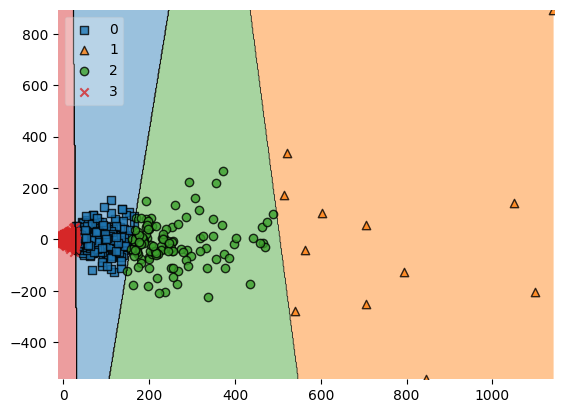

In [ ]:
# PCA training
pca = PCA(n_components=2)
X_tranformed = pca.fit_transform(df)

# Visualization
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X_tranformed)
plot_decision_regions(X=X_tranformed, y=y_pred, clf=kmeans, legend=2)

In [ ]:
def k_means_and_plot(X, y, k=2):
    initial_centers = kmeans_pp(X, k)
    clf = KMeans(k, initial_centers).fit(X,y)
    y_pred = clf.predict(X)
    plot_decision_regions(X=X, y=y_pred, clf=clf, legend=2)
    #plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='*', c='red', s=250,label='Init centers')
    plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='Centroids')
    plt.legend()

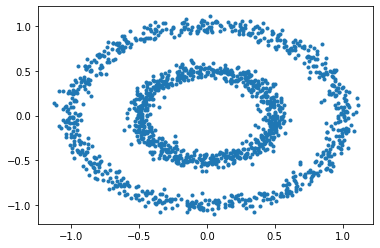

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1500
X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)
plt.scatter(X[:,0], X[:,1], marker='.')

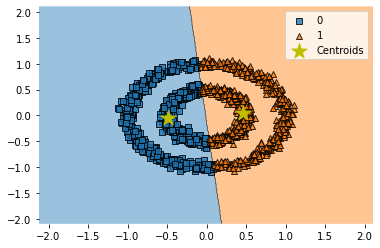

In [ ]:
k_means_and_plot(X, y)

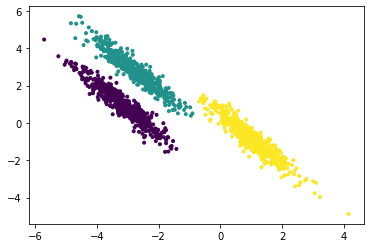

In [ ]:
# Anisotropicly distributed data
random_state = 170
X, y_aniso = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y_aniso)
plt.scatter(X_aniso[:,0], X_aniso[:,1], marker='.', c=y_aniso)

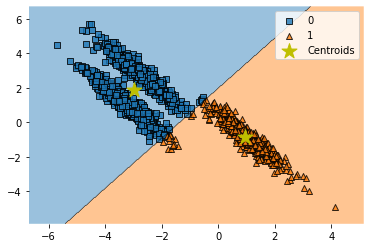

In [ ]:
k_means_and_plot(X_aniso, y_aniso)